In [1]:
## check CPU specification  
## https://colab.research.google.com/drive/16eTwQc1RBaLrMYaeGl6dNhQxMWXj8lUJ
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz


In [2]:
## check Ubuntu version - Ubuntu 18.04.3 LTS
!lsb_release -d
## https://software.intel.com/en-us/forums/intel-distribution-of-openvino-toolkit/topic/813684
## Ubuntu 18 is technically not supported by OpenVino. 
## That said many people in the OpenVino community have gotten 
## it working on Ubuntu 18.

Description:	Ubuntu 18.04.3 LTS


In [3]:
!sudo apt-get install pciutils
# Setting up pciutils (1:3.5.2-1ubuntu1.1) ...
'''
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  libarchive1
The following NEW packages will be installed:
  cpio
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
'''
!sudo apt-get update -y
!sudo apt-get install -y cpio
!sudo apt autoremove

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpci3
The following NEW packages will be installed:
  libpci3 pciutils
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 281 kB of archives.
After this operation, 1,430 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libpci3 amd64 1:3.5.2-1ubuntu1.1 [24.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 pciutils amd64 1:3.5.2-1ubuntu1.1 [257 kB]
Fetched 281 kB in 1s (437 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
de

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
import numpy as np


IMAGE_NAME = 'Cat.jpg'

# Grab path to current working directory

CWD_P = '/content/drive/My Drive/' # Path to image

PATH_TO_IMAGE = '/content/drive/My Drive/Cat.jpg' #os.path.join(CWD_PATH,IMAGE_NAME)ATH = os.getcwd()

image = cv2.imread(PATH_TO_IMAGE)

image_expanded = np.expand_dims(image, axis=0)


In [6]:
image = cv2.imread('/content/drive/My Drive/Cat.jpg')
print(image.shape)

(720, 1080, 3)


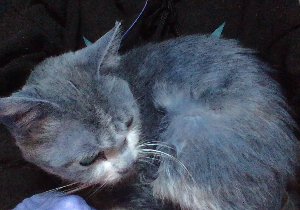

In [7]:
from google.colab.patches import cv2_imshow
img = cv2.resize(image, (300, 210))
# convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img) # cv2.imshow()

In [8]:
import os
import json

## list all user environment variables
# print(json.dumps(dict(os.environ), 
#                  indent=4, sort_keys=False))
## list user path environment variables
# !echo $PATH
print(os.environ['PATH'])

## list system variables PATH
import sys
sys.path

/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin


['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

In [9]:
%%time
%%capture
## install tools
!sudo apt-get install -y pciutils cpio
!sudo apt autoremove
## downnload installation files
!wget http://registrationcenter-download.intel.com/akdlm/irc_nas/16057/l_openvino_toolkit_p_2019.3.376.tgz
# path = "/content/l_openvino_toolkit_p_2019.3.376.tgz"
path = "/content/drive/My Drive/software/Intel OpenVINO 2019 R3.1/l_openvino_toolkit_p_2019.3.376.tgz"
## install openvino
!tar xf "{path}" && \
    cd l_openvino_toolkit_p* && \
    ./install_openvino_dependencies.sh && \
    sed -i 's/decline/accept/g' silent.cfg && \
    ./install.sh --silent silent.cfg
## install dependencies
!/opt/intel/openvino/install_dependencies/install_openvino_dependencies.sh
## install prerequisites
!/opt/intel/openvino/deployment_tools/model_optimizer/install_prerequisites/install_prerequisites.sh


CPU times: user 152 ms, sys: 42.9 ms, total: 195 ms
Wall time: 11.3 s


In [13]:
%%time
'''
CPU times: user 1.02 s, sys: 134 ms, total: 1.15 s
Wall time: 3min 12s
'''
## run demo
!source /opt/intel/openvino/bin/setupvars.sh && \
    /opt/intel/openvino/deployment_tools/demo/demo_squeezenet_download_convert_run.sh

/bin/bash: /opt/intel/openvino/bin/setupvars.sh: No such file or directory
CPU times: user 73.3 ms, sys: 6.17 ms, total: 79.4 ms
Wall time: 4.48 s


In [14]:
!wget http://registrationcenter-download.intel.com/akdlm/irc_nas/16057/l_openvino_toolkit_p_2019.3.376.tgz

--2020-03-05 21:40:04--  http://registrationcenter-download.intel.com/akdlm/irc_nas/16057/l_openvino_toolkit_p_2019.3.376.tgz
Resolving registrationcenter-download.intel.com (registrationcenter-download.intel.com)... 104.84.236.5, 2600:1409:5000:49a::b, 2600:1409:5000:480::b
Connecting to registrationcenter-download.intel.com (registrationcenter-download.intel.com)|104.84.236.5|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 507259586 (484M) [application/x-compressed]
Saving to: ‘l_openvino_toolkit_p_2019.3.376.tgz.1’

l_openvino_toolkit_ 100%[===================>] 483.76M  5.08MB/s    in 93s     

2020-03-05 21:41:37 (5.20 MB/s) - ‘l_openvino_toolkit_p_2019.3.376.tgz.1’ saved [507259586/507259586]



In [16]:
!tar -zxvf l_openvino_toolkit_p_2019.3.376.tgz


l_openvino_toolkit_p_2019.3.376/
l_openvino_toolkit_p_2019.3.376/pset/
l_openvino_toolkit_p_2019.3.376/pset/32e/
l_openvino_toolkit_p_2019.3.376/pset/32e/libz/
l_openvino_toolkit_p_2019.3.376/pset/32e/libz/libz.so
l_openvino_toolkit_p_2019.3.376/pset/32e/libz/libz.so.1
l_openvino_toolkit_p_2019.3.376/pset/32e/libz/libz.so.1.2.11
l_openvino_toolkit_p_2019.3.376/pset/32e/platforms/
l_openvino_toolkit_p_2019.3.376/pset/32e/platforms/libqxcb.so
l_openvino_toolkit_p_2019.3.376/pset/32e/qt/
l_openvino_toolkit_p_2019.3.376/pset/32e/qt/libQt5Core.so
l_openvino_toolkit_p_2019.3.376/pset/32e/qt/libQt5Core.so.5
l_openvino_toolkit_p_2019.3.376/pset/32e/qt/libQt5Core.so.5.12
l_openvino_toolkit_p_2019.3.376/pset/32e/qt/libQt5Core.so.5.12.4
l_openvino_toolkit_p_2019.3.376/pset/32e/qt/libQt5DBus.so
l_openvino_toolkit_p_2019.3.376/pset/32e/qt/libQt5DBus.so.5
l_openvino_toolkit_p_2019.3.376/pset/32e/qt/libQt5DBus.so.5.12
l_openvino_toolkit_p_2019.3.376/pset/32e/qt/libQt5DBus.so.5.12.4
l_openvino_toolkit

In [20]:
!sudo apt-get install pciutils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pciutils is already the newest version (1:3.5.2-1ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [21]:
%cd /content/l_openvino_toolkit_p_2019.3.376
## command line installation
!sudo ./install.sh


/content/l_openvino_toolkit_p_2019.3.376
--------------------------------------------------------------------------------
Initializing, please wait...
--------------------------------------------------------------------------------
Welcome
--------------------------------------------------------------------------------
Welcome to the Intel® Distribution of OpenVINO™ toolkit 2019 R3.1 for Linux*
--------------------------------------------------------------------------------
The Intel installation wizard will install the Intel® Distribution of OpenVINO™
toolkit 2019 R3.1 for Linux* to your system.

The Intel® Distribution of OpenVINO™ toolkit quickly deploys applications and
solutions that emulate human vision. Based on Convolutional Neural Networks
(CNN), the toolkit extends computer vision (CV) workloads across Intel®
hardware, maximizing performance. The Intel Distribution of OpenVINO toolkit
includes the Intel® Deep Learning Deployment Toolkit (Intel® DLDT).

Before installation ple

In [22]:

%cd /content/l_openvino_toolkit_p_2019.3.376
## command line installation
!sudo ./install.sh

/content/l_openvino_toolkit_p_2019.3.376
--------------------------------------------------------------------------------
Initializing, please wait...
--------------------------------------------------------------------------------
This product is already installed
--------------------------------------------------------------------------------
Installation program has detected that at least one component of the product is 
already installed. Select one of the following options to continue: 
--------------------------------------------------------------------------------

   1. Modify the installation [ default ]
   2. Repair the installation
   3. Uninstall the product

   h. Help
   q. Quit installation

--------------------------------------------------------------------------------
Please type a selection or press "Enter" to accept default choice [ 1 ]: 
--------------------------------------------------------------------------------
Initializing, please wait...
-------------------

CPU times: user 154 ms, sys: 38.2 ms, total: 193 ms
Wall time: 11.3 s


/bin/bash: /opt/intel/openvino/bin/setupvars.sh: No such file or directory
CPU times: user 19.8 ms, sys: 3.69 ms, total: 23.5 ms
Wall time: 1.03 s


/content
--2020-03-04 21:25:01--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.203.128, 2607:f8b0:400c:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.203.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187925923 (179M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz.1’

ssd_mobilenet_v2_co 100%[===================>] 179.22M   207MB/s    in 0.9s    

2020-03-04 21:25:02 (207 MB/s) - ‘ssd_mobilenet_v2_coco_2018_03_29.tar.gz.1’ saved [187925923/187925923]



/content/drive/My Drive/ssd_mobilenet_v2_coco_2018_03_29
/bin/bash: /setupvars.sh: No such file or directory
